# Content based Recommender System

In [1]:
# importing libraries

# importing data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# language processing library
import re

import nltk
from nltk.corpus import stopwords

import spacy
from spacy.tokens import Span

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Setting up NLP
nlp = spacy.load("en_core_web_md")

In [2]:
# Loading data
business = pd.read_csv("Data/business.csv")

review = pd.read_csv("Data/review.csv")

In [3]:
review.head()

,business_id,review_id,user_id,stars_y,useful,funny,cool,text,date
0,j9Kaj_6tSeXmVMYCgZithg,6mfN9Erl6ecyO4qqxLkGEg,h6LA4iyolaZeudiQODGjTA,3,0,0,0,My friend and I had dinner here on Sunday. I w...,2017-10-02 14:45:59
1,j9Kaj_6tSeXmVMYCgZithg,hBtqj6r1JvShLfsq_ZwTOQ,wcG3qpsIxQ1BDJ2aOrwPNw,5,0,0,0,Great food! Very impressed...I really like the...,2018-05-19 02:19:28
2,j9Kaj_6tSeXmVMYCgZithg,SJ_wsjL9mYbKB6a9K1AFyw,gUnPBegsa514ghtZJZtp1A,2,0,0,0,Not a fan. Italian food is pretty straight for...,2018-09-14 13:10:27
3,sophKEDc2rBDe-cuOaJDkA,7L4O5x5PoAr06-gbuudCKw,LmaOptmkvxVEvftB3_AsFw,5,0,0,0,We were looking for a dairy free ice cream pla...,2017-10-24 22:51:50
4,sophKEDc2rBDe-cuOaJDkA,hIi2M0p3_MWjy1eK9--rOA,hz7-FmMJFBvavfP6G8zsfg,3,0,0,1,Very overpriced for literally HALF a panini. I...,2015-08-06 21:27:02


In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22550 entries, 0 to 22549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  22550 non-null  object
 1   review_id    22550 non-null  object
 2   user_id      22550 non-null  object
 3   stars_y      22550 non-null  int64 
 4   useful       22550 non-null  int64 
 5   funny        22550 non-null  int64 
 6   cool         22550 non-null  int64 
 7   text         22550 non-null  object
 8   date         22550 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.5+ MB


In [5]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,3173 Cypress Ridge Blvd,Wesley Chapel,FL,33544,28.196252,-82.380615,4.5,95,1,"{'BestNights': ""{'monday': False, 'tuesday': F...","Burgers, Sports Bars, Bars, Lounges, Restauran...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-23:..."
1,j9Kaj_6tSeXmVMYCgZithg,Noble Crust,28330 Paseo Dr,Wesley Chapel,FL,33543,28.188219,-82.347274,4.5,496,1,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...","Restaurants, Italian, Nightlife, Southern, Bar...","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
2,KNfqu3kNwn6eDMJjP0cNcg,Dental Care at Quail Hollow,28385 State Road 54,Wesley Chapel,FL,33543,28.237579,-82.347128,3.0,9,1,NaN,"General Dentistry, Dentists, Health & Medical","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
3,p3QzxYDXLs6AthCldH-_Og,James L Frank Door Service,6415 Wendell Dr,Wesley Chapel,FL,33544,28.250516,-82.373726,5.0,10,1,{'BusinessAcceptsCreditCards': 'True'},"Contractors, Garage Door Services, Home Services","{'Monday': '8:0-17:30', 'Tuesday': '8:0-17:30'..."
4,zaaX5EzJDNxhzIFywyxYKg,Wesley Chapel Florist,"2653 Bruce B Downs, Ste 108",Wesley Chapel,FL,33544,28.194900,-82.354215,2.5,6,0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Florists, Shopping, Flowers & Gifts","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ..."


In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   560 non-null    object 
 1   name          560 non-null    object 
 2   address       537 non-null    object 
 3   city          560 non-null    object 
 4   state         560 non-null    object 
 5   postal_code   560 non-null    int64  
 6   latitude      560 non-null    float64
 7   longitude     560 non-null    float64
 8   stars         560 non-null    float64
 9   review_count  560 non-null    int64  
 10  is_open       560 non-null    int64  
 11  attributes    513 non-null    object 
 12  categories    559 non-null    object 
 13  hours         483 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 61.4+ KB


# Text Processing / Cleaning Text

In [7]:
def process_text(text):
    """
    Tokenize_text function using Spacy's default stop words.
    
    :param text: Text: str
    :return: list of tokens.
    """

    # Lowering all text.
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Filter out tokens.
    filtered_tokens = []

    for token_text in nlp(text):
        # Get tokens that are alpha, and not stop words.
        if token_text.text.isalpha() and token_text.text not in nlp.Defaults.stop_words:
            # Token length has to be more than 2 and less than 19.
            if 2 < len(token_text) < 19:
                filtered_tokens.append(str(token_text))
    return filtered_tokens

In [8]:
#--Takes a long time to process text: 40 mins!--
#Apply the tokenization function to all 'text' in the review training dataset.
processed_text = review.text.apply(process_text)

In [9]:
#Convert into a list of tokenized strings.
clean_txt = [str(i) for i in processed_text]

#Copied data frame with cleaned text.
cln_train = review
cln_train["cleaned_text"] = clean_txt
cln_train.head(5)

,business_id,review_id,user_id,stars_y,useful,funny,cool,text,date,cleaned_text
0,j9Kaj_6tSeXmVMYCgZithg,6mfN9Erl6ecyO4qqxLkGEg,h6LA4iyolaZeudiQODGjTA,3,0,0,0,My friend and I had dinner here on Sunday. I w...,2017-10-02 14:45:59,"['friend', 'dinner', 'sunday', 'surprised', 's..."
1,j9Kaj_6tSeXmVMYCgZithg,hBtqj6r1JvShLfsq_ZwTOQ,wcG3qpsIxQ1BDJ2aOrwPNw,5,0,0,0,Great food! Very impressed...I really like the...,2018-05-19 02:19:28,"['great', 'food', 'impressedi', 'like', 'brunc..."
2,j9Kaj_6tSeXmVMYCgZithg,SJ_wsjL9mYbKB6a9K1AFyw,gUnPBegsa514ghtZJZtp1A,2,0,0,0,Not a fan. Italian food is pretty straight for...,2018-09-14 13:10:27,"['fan', 'italian', 'food', 'pretty', 'straight..."
3,sophKEDc2rBDe-cuOaJDkA,7L4O5x5PoAr06-gbuudCKw,LmaOptmkvxVEvftB3_AsFw,5,0,0,0,We were looking for a dairy free ice cream pla...,2017-10-24 22:51:50,"['looking', 'dairy', 'free', 'ice', 'cream', '..."
4,sophKEDc2rBDe-cuOaJDkA,hIi2M0p3_MWjy1eK9--rOA,hz7-FmMJFBvavfP6G8zsfg,3,0,0,1,Very overpriced for literally HALF a panini. I...,2015-08-06 21:27:02,"['overpriced', 'literally', 'half', 'panini', ..."


In [10]:
# Applied for user_id data.

#Create USER dataframe.
user_train = cln_train.groupby("user_id")["cleaned_text"].agg(list).reset_index()
user_train["cleaned_text"] = user_train["cleaned_text"].apply(lambda x: " ".join(map(str, x)))
user_train.head(5)

,user_id,cleaned_text
0,--8r3pNaZiG1fN8LCHuL_g,"['second', 'time', 'went', 'grillsmith', 'entr..."
1,--DBsOOiMurIanfF2GQLmQ,"['sub', 'par', 'donuts', 'missing', 'sugar', '..."
2,--bK3rF1_DLb1jRbdCbHzQ,"['place', 'little', 'gem', 'lots', 'italian', ..."
3,--dcLy7EBWOYkaAx4XNrUQ,"['checked', 'place', 'find', 'fur', 'babies', ..."
4,-0bVzQLwDqn-w5qsoxsDzw,"['great', 'people', 'nice', 'environment', 'wo..."


In [11]:
#Create BUSINESS dataframe.
business_train = cln_train.groupby("business_id")["cleaned_text"].agg(list).reset_index()
business_train["cleaned_text"] = business_train["cleaned_text"].apply(lambda x: "".join(map(str, x)))
business_train.head(5)

,business_id,cleaned_text
0,--7jw19RH9JKXgFohspgQw,"['best', 'dentist', 'area', 'hands', 'thorough..."
1,-2j8XqQL68DPqYiafH9JXg,"['date', 'accident', 'accident', 'active', 'pe..."
2,-2kVXSZJsZCi3edaIU4AkA,"['came', 'strive', 'groupon', 'facility', 'tuc..."
3,-9kg8ne9Nmw_6BbFqurAxA,"['beautiful', 'campus', 'nice', 'country', 'se..."
4,-BKUma4mz8uqH30nfOUiyQ,"['wish', 'zero', 'stars', 'worst', 'hair', 'sa..."


## Creating Embeddings

In [12]:
def load_glove(vector_len=50):
  '''Function using Glove.'''

  #Vector_len must be 50/100/200/300.
  GloVe = f"Data/glove.6B.{vector_len}d.txt"

  #Dictionary stores embeddings of all words.
  embeddings_dict = {}

  with open(GloVe, 'r', encoding="utf-8") as f:
    for line in f:
      values = line.split()
      word = str(values[0])

      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector
  return embeddings_dict

#Using vector length = 300 per recommendation.
glove_embeddings = load_glove(50)

In [13]:
def mean_embedding(words, embeddings_dict):
    """
    Compute the mean embedding vector for a list of tokens using spaCy.
    
    :param tokens: List[str]: A list of tokens.
    :return: np.ndarray: The mean embedding vector.
    """
    #Filter embedding_dict by words and store the embeddings in a list.
    embeddings = [embeddings_dict[word] for word in words if word in embeddings_dict]
    
    #Check if any embeddings were found.
    if embeddings:
        #Calculate the mean of the embeddings and return the result.
        return np.mean(embeddings, axis=0)
    else:
        #Return a zero vector if no embeddings were found.
        return np.zeros(len(next(iter(embeddings_dict.values()))))

In [14]:
#Update the user dataframe with mean embeddings.
user_train['mean_embedding'] = user_train['cleaned_text'].apply(lambda x: mean_embedding(x, glove_embeddings))

In [15]:
user_train.head()

,user_id,cleaned_text,mean_embedding
0,--8r3pNaZiG1fN8LCHuL_g,"['second', 'time', 'went', 'grillsmith', 'entr...","[-0.058517847, 0.8421155, 0.52709866, 0.401933..."
1,--DBsOOiMurIanfF2GQLmQ,"['sub', 'par', 'donuts', 'missing', 'sugar', '...","[-0.093027905, 0.86318016, 0.5383551, 0.396766..."
2,--bK3rF1_DLb1jRbdCbHzQ,"['place', 'little', 'gem', 'lots', 'italian', ...","[-0.06431558, 0.84969485, 0.52606285, 0.403503..."
3,--dcLy7EBWOYkaAx4XNrUQ,"['checked', 'place', 'find', 'fur', 'babies', ...","[-0.07324091, 0.8506611, 0.5230907, 0.39035, 0..."
4,-0bVzQLwDqn-w5qsoxsDzw,"['great', 'people', 'nice', 'environment', 'wo...","[-0.043221872, 0.8839479, 0.601221, 0.45561984..."


In [16]:
user_train["mean_embedding"].apply(lambda x: len(x) == 50).any()

True

In [17]:
#Update the business dataframe with mean embeddings.
business_train['mean_embedding'] = business_train['cleaned_text'].apply(lambda x: mean_embedding(x, glove_embeddings))

In [18]:
business_train.head()

,business_id,cleaned_text,mean_embedding
0,--7jw19RH9JKXgFohspgQw,"['best', 'dentist', 'area', 'hands', 'thorough...","[-0.060384892, 0.8384029, 0.5274572, 0.3991927..."
1,-2j8XqQL68DPqYiafH9JXg,"['date', 'accident', 'accident', 'active', 'pe...","[-0.0579965, 0.8450988, 0.5570951, 0.40535125,..."
2,-2kVXSZJsZCi3edaIU4AkA,"['came', 'strive', 'groupon', 'facility', 'tuc...","[-0.06644458, 0.86746114, 0.5355576, 0.4180080..."
3,-9kg8ne9Nmw_6BbFqurAxA,"['beautiful', 'campus', 'nice', 'country', 'se...","[-0.0717694, 0.8608019, 0.5395775, 0.41879418,..."
4,-BKUma4mz8uqH30nfOUiyQ,"['wish', 'zero', 'stars', 'worst', 'hair', 'sa...","[-0.059634764, 0.8513451, 0.527847, 0.399517, ..."


In [19]:
business_train["mean_embedding"].apply(lambda x: len(x) == 50).any()

True

In [20]:
modeling_df = review[["business_id","user_id","stars_y"]]

#### Creating a new dataframe that would have the embeddings

In [21]:
# Merge embedding into the modeling table
modeling_df = modeling_df.merge(user_train, on="user_id", how='left')
modeling_df = modeling_df.merge(business_train, on="business_id", how='left')

In [22]:
df = modeling_df.drop(["business_id","user_id", "cleaned_text_x","cleaned_text_y"], axis=1)

In [23]:
df["combined_embedding"] = df.apply(lambda row: np.multiply(row["mean_embedding_x"], row["mean_embedding_y"]), axis=1)

In [24]:
df.head()

,stars_y,mean_embedding_x,mean_embedding_y,combined_embedding
0,3,"[-0.058128297, 0.84133905, 0.52290195, 0.39414...","[-0.057604305, 0.8438536, 0.51546, 0.3977966, ...","[0.0033484402, 0.70996696, 0.26953503, 0.15678..."
1,5,"[-0.07132384, 0.8737518, 0.50882274, 0.3971934...","[-0.057604305, 0.8438536, 0.51546, 0.3977966, ...","[0.0041085603, 0.73731863, 0.26227778, 0.15800..."
2,2,"[-0.06502339, 0.85594684, 0.51557505, 0.394844...","[-0.057604305, 0.8438536, 0.51546, 0.3977966, ...","[0.0037456274, 0.7222938, 0.26575834, 0.157067..."
3,5,"[-0.0626009, 0.8528267, 0.50812423, 0.38014013...","[-0.056643073, 0.85014755, 0.51740193, 0.40024...","[0.0035459076, 0.7250285, 0.26290447, 0.152147..."
4,3,"[-0.05302393, 0.8477832, 0.5346507, 0.40074608...","[-0.056643073, 0.85014755, 0.51740193, 0.40024...","[0.0030034382, 0.7207408, 0.2766293, 0.1603950..."


# Machine Learning Modeling begins

In [25]:
# Import library for splitting data and randomly selecting parameter
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold

# Import regrogressor models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Importing evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
# Creating a new dataframe with vector as column and sentiment
X = pd.DataFrame(df['combined_embedding'].to_list(), index=df.index)

# Define target variable
y = df['stars_y']

In [27]:
# Using Stratisfied train-test split to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [28]:
# Defining the models
models={
    'LR': LinearRegression(),
    'RFR': RandomForestRegressor(),
    'DTR': DecisionTreeRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

In [29]:
# Define the parameter grids
param_grids = {
    'LR': {
        'fit_intercept': [True, False]
    },
    'DTR': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RFR': {
        'n_estimators': [10,50,100,200],
        'max_depth': [10,20,30,50],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4,6]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3,5,7,10]
    }
}

In [30]:
def perform_search(parameter, X_train, y_train, X_test, y_test ,models):
    # Perform RandomizedSearchCV
    results = []

    # Running multiple models to get the best parameter for each model
    for model_name in models:
        print(f"Running for {model_name}...")

        # Get the model
        model = models[model_name]
    
        # Get the appropriate paramters for that model
        param_grid = parameter[model_name]

        # calculate the total nummber of parameter combinations
        param_combinations = np.prod([len(v) for v in param_grid.values()])

        # If the length of the parameter is less than 10 then do a normal gridsearch
        if param_combinations < 10:
            search = GridSearchCV(model, param_grid, cv=5, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
        
        # Else do a randomized search to save time
        else:
            search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                        n_iter=10, cv=5, 
                                        scoring='neg_mean_squared_error', 
                                        random_state=42, n_jobs=-1)

        # fit the model to the training set
        search.fit(X_train, y_train)
        best_model = search.best_estimator_

        # Using the best parameters for each model get the predicted values
        y_pred = best_model.predict(X_test)

        # Get the evaluation metrics for each model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Append the results of the model to the list along side its paramters
        results.append({
            'Model': model_name,
            'Best Parameters': search.best_params_,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae
        })
    
        print(f"Best parameters for {model_name}: {search.best_params_}")
        print(f"Mean Squared Error for {model_name}: {mse}")
        print(f"Root Mean Squared Error for {model_name}: {rmse}")
        print(f"Mean Absolute Error for {model_name}: {mae}")
        print()

    return results

In [31]:
res = perform_search(param_grids, X_train, y_train, X_test, y_test , models) 

Running for LR...
Best parameters for LR: {'fit_intercept': True}
Mean Squared Error for LR: 2.110005152432824
Root Mean Squared Error for LR: 1.4525856781728312
Mean Absolute Error for LR: 1.2451178046745983

Running for RFR...
Best parameters for RFR: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 30}
Mean Squared Error for RFR: 2.0984772060548833
Root Mean Squared Error for RFR: 1.4486121655070012
Mean Absolute Error for RFR: 1.2402847047092664

Running for DTR...
Best parameters for DTR: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Mean Squared Error for DTR: 2.681054075456064
Root Mean Squared Error for DTR: 1.637392462257007
Mean Absolute Error for DTR: 1.304957505344566

Running for SVR...
Best parameters for SVR: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}
Mean Squared Error for SVR: 2.276684222532456
Root Mean Squared Error for SVR: 1.5088685239385358
Mean Absolute Error for SVR: 1.2217815304636546

Running for KNN.

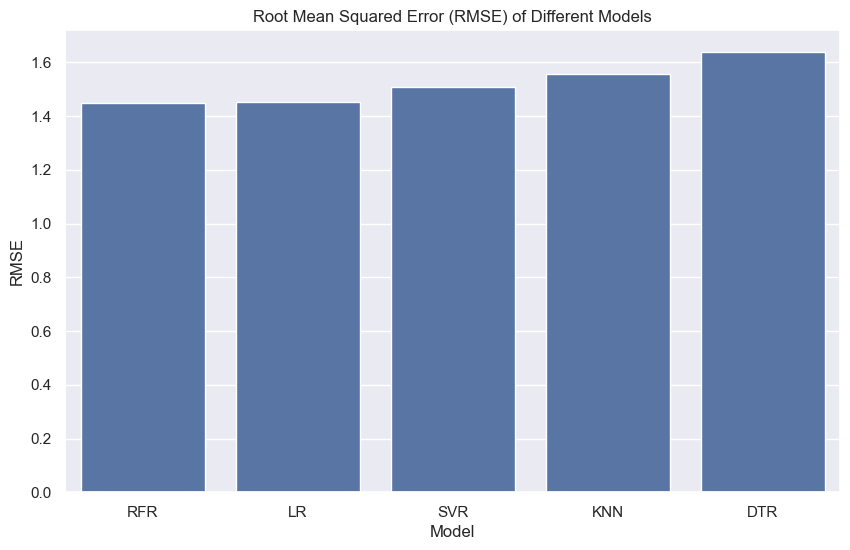

In [32]:
# Convert results to DataFrame
results_df = pd.DataFrame(res)

results_df_sorted = results_df.sort_values(by='RMSE') 

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df_sorted)
plt.title('Root Mean Squared Error (RMSE) of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

### Adding Sentiment to see how the models fair

In [33]:
# Initialize VADER sentiment analyzer
analyser = SentimentIntensityAnalyzer()

# Funtion to get sentiment from text
def get_sentiment(text):
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score['compound']

In [34]:
# Apply the function to the text column
df['sentiment'] = review['text'].apply(get_sentiment)

In [35]:
df.head()

,stars_y,mean_embedding_x,mean_embedding_y,combined_embedding,sentiment
0,3,"[-0.058128297, 0.84133905, 0.52290195, 0.39414...","[-0.057604305, 0.8438536, 0.51546, 0.3977966, ...","[0.0033484402, 0.70996696, 0.26953503, 0.15678...",0.9661
1,5,"[-0.07132384, 0.8737518, 0.50882274, 0.3971934...","[-0.057604305, 0.8438536, 0.51546, 0.3977966, ...","[0.0041085603, 0.73731863, 0.26227778, 0.15800...",0.8920
2,2,"[-0.06502339, 0.85594684, 0.51557505, 0.394844...","[-0.057604305, 0.8438536, 0.51546, 0.3977966, ...","[0.0037456274, 0.7222938, 0.26575834, 0.157067...",0.8275
3,5,"[-0.0626009, 0.8528267, 0.50812423, 0.38014013...","[-0.056643073, 0.85014755, 0.51740193, 0.40024...","[0.0035459076, 0.7250285, 0.26290447, 0.152147...",0.9768
4,3,"[-0.05302393, 0.8477832, 0.5346507, 0.40074608...","[-0.056643073, 0.85014755, 0.51740193, 0.40024...","[0.0030034382, 0.7207408, 0.2766293, 0.1603950...",-0.5256


In [36]:
# Creating a new dataframe with vector as column and sentiment
embedding_features = pd.DataFrame(df['combined_embedding'].to_list(), index=df.index)
features = pd.concat([embedding_features, df['sentiment']], axis=1)

# Define target variable
target = df['stars_y']

In [37]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101, stratify=target)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [38]:
res = perform_search(param_grids, X_train, y_train, X_test, y_test, models=models)

Running for LR...
Best parameters for LR: {'fit_intercept': True}
Mean Squared Error for LR: 1.166809768693053
Root Mean Squared Error for LR: 1.080189691069607
Mean Absolute Error for LR: 0.8329520725994037

Running for RFR...
Best parameters for RFR: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 30}
Mean Squared Error for RFR: 1.07975558813512
Root Mean Squared Error for RFR: 1.0391128851742335
Mean Absolute Error for RFR: 0.7816140448556022

Running for DTR...
Best parameters for DTR: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Mean Squared Error for DTR: 1.4186596605536643
Root Mean Squared Error for DTR: 1.1910750020689984
Mean Absolute Error for DTR: 0.8296214953584881

Running for SVR...
Best parameters for SVR: {'kernel': 'poly', 'gamma': 'auto', 'C': 10}
Mean Squared Error for SVR: 1.311495044079504
Root Mean Squared Error for SVR: 1.1452052410286568
Mean Absolute Error for SVR: 0.7527166270136221

Running for KNN...
B

### Creating stacking model

In [39]:
from sklearn.ensemble import StackingRegressor

In [40]:
# Defining base models
base_models = [
    ('lr', LinearRegression(fit_intercept=True)),
    ('RFR',RandomForestRegressor(max_depth=30,
                           min_samples_leaf=6,
                            min_samples_split=10,
                            n_estimators=200)),
    ('DTR', DecisionTreeRegressor(min_samples_leaf=4,
                           min_samples_split=10,
                           max_depth=10)),
    ('SVR', SVR(kernel='poly',gamma='auto',C=10)),
    ('KNN', KNeighborsRegressor(n_neighbors=10, metric='cosine'))]

# defining meta model
meta_model = RandomForestRegressor(max_depth=30,
                           min_samples_leaf=6,
                            min_samples_split=10,
                            n_estimators=200)

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=KFold(n_splits=5))

In [41]:
# Train the stacking model
stacking_regressor.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=RandomState(MT19937) at 0x21A59F01340,
   shuffle=False),
                  estimators=[('lr', LinearRegression()),
                              ('RFR',
                               RandomForestRegressor(max_depth=30,
                                                     min_samples_leaf=6,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                              ('DTR',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                              ('SVR', SVR(C=10, gamma='auto', kernel='poly')),
                              ('KNN',
                               KNeighborsRegressor(metric='cosine',
                                                   n_neighbors=10))],
                  final_estimator=RandomForestRegressor(max_depth=30,
                                                        min_samples_leaf=6,
                                                        min_samples_split=10,
                                                        n_estimators=200))

In [44]:
# Predict on the test set
y_pred = stacking_regressor.predict(X_test)

# calculating mse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

res.append({'Model': 'Stacked',
              'Best Parameter': 'NA',
              'MSE': mse,
              'RMSE': rmse,
              'MAE': mae})

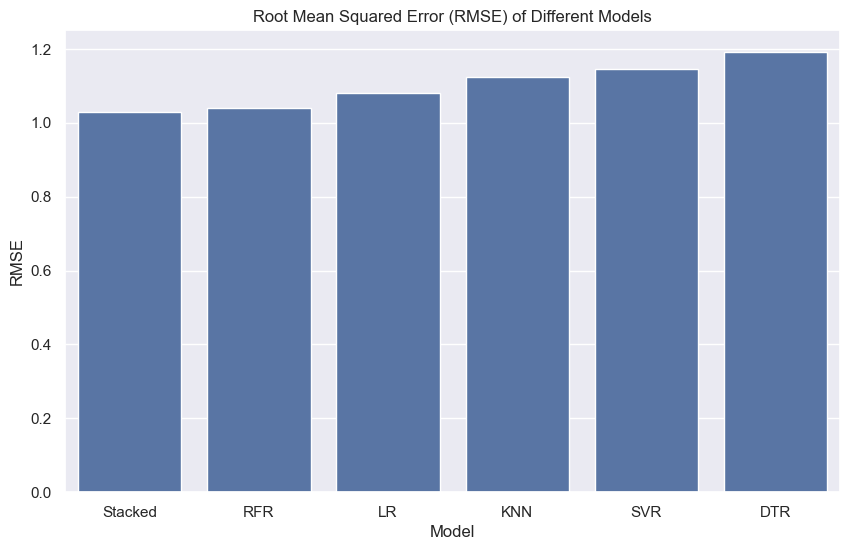

In [45]:
# Convert results to DataFrame
sent_result = pd.DataFrame(res)

sent_result_sorted = sent_result.sort_values(by='RMSE')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=sent_result_sorted)
plt.title('Root Mean Squared Error (RMSE) of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

In [46]:
# Function to get recommendations for a user
def get_recommendations(user_id, num_recommendations=10):
    # Filter out items the user has already rated
    rated_items = cln_train[cln_train['user_id'] == user_id]['business_id']
    unrated_items = cln_train[~cln_train['business_id'].isin(rated_items)]

    # prepare the data
    temp_df = pd.merge(features, unrated_items, left_index=True, right_index=True)
    temp_df = temp_df.drop(['business_id',
          'review_id',      'user_id',      'stars_y',       'useful',
              'funny',         'cool',         'text',         'date',
       'cleaned_text'], axis=1)
    temp_df.columns = temp_df.columns.astype(str)

    # predict the rating for unrated_items
    y_unrated_pred = stacking_regressor.predict(temp_df)


    # Get top N recommendations
    top_indices = np.argsort(y_unrated_pred)[-num_recommendations:]
    top_recommendations = unrated_items.iloc[top_indices]

    # Get the business name / info
    recs = pd.merge(top_recommendations, business, on='business_id', how='left')

    recs['predicted'] = y_unrated_pred[top_indices]
    return recs[['business_id', 'name','stars', 'predicted']] 

In [47]:
# Example usage:
user_id = 'h6LA4iyolaZeudiQODGjTA'  # Replace with a valid user_id from dataset
recommendations = get_recommendations(user_id, 10)

print("Top Recommendations:")
display(recommendations)

Top Recommendations:


,business_id,name,stars,predicted
0,rwZvfQHICPyHUP-dkXpqPg,Insight Family Eyecare,4.0,4.994079
1,SmUnJxCPO_78B3Z5FMdO1w,900 Degrees New York Pizza,3.5,4.994147
2,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,4.5,4.994358
3,YVhIVwsnc7NQTWiE2kHJ-A,ALCA Plumbing,4.5,4.994530
4,z8YngIHNZI0A05DeMU_GPw,UNION72 Barbecue,4.0,4.994800
5,8AUtmXCL5rOOQeh_cAYN2g,Hibachi Japanese Express,3.5,4.995333
6,Di23dhpgrqBHMUq6vZ42zw,Batter & Dough,4.5,4.996303
7,rZFm1YslDSv-Uy2oZ41eIQ,Avalon Spa & Nails,4.5,4.999028
8,XisEaN0YxDeMc-9rQp6Qag,Degaje Local Market,4.5,4.999286
9,po7P5Ea6u8qnkG_likIfFg,The New Tampa Oral & Facial Surgery,5.0,4.999545
